In [19]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [20]:

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Remove 'Datum' column if it exists
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)


# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (6484, 49)
Loaded Validation features dimensions: (1852, 49)
Loaded Test features dimensions: (928, 49)

Loaded Training labels dimensions: (6484, 1)
Loaded Validation labels dimensions: (1852, 1)
Loaded Test labels dimensions: (928, 1)

First few rows of loaded training features:
   Wettercode_1.0  Wettercode_2.0  Wettercode_3.0  Wettercode_5.0  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Wettercode_10.0  Wettercode_13.0  Wettercode_17.0  Wettercode_20.0  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0            

In [21]:
# define neural net
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(12, activation='relu'),
  Dense(5, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 49)             │           196 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867 (3.39 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 98 (392.00 B)

In [22]:
# compile with mean squared error
model.compile(loss="mse", optimizer=Adam(learning_rate=0.005))

history = model.fit(training_features, training_labels, epochs=25,
                    validation_data=(validation_features, validation_labels))

Epoch 1/25


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48729.5312 - val_loss: 13242.6064
Epoch 2/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9758.9131 - val_loss: 7410.0903
Epoch 3/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8096.2173 - val_loss: 6805.8159
Epoch 4/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7056.3823 - val_loss: 6659.9966
Epoch 5/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8598.8711 - val_loss: 6553.6665
Epoch 6/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7982.2212 - val_loss: 6480.7754
Epoch 7/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6114.2026 - val_loss: 6402.4863
Epoch 8/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8577.0752 - val_loss: 6450.9316
Epoch 9/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7412.3887 - val_loss: 6295.9834
Epoch 10/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6984.4312 - val_loss: 6285.1616
Epoch 11/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6849.9028 - val_loss: 6160.

In [23]:
# safe
model.save("model1.h5")

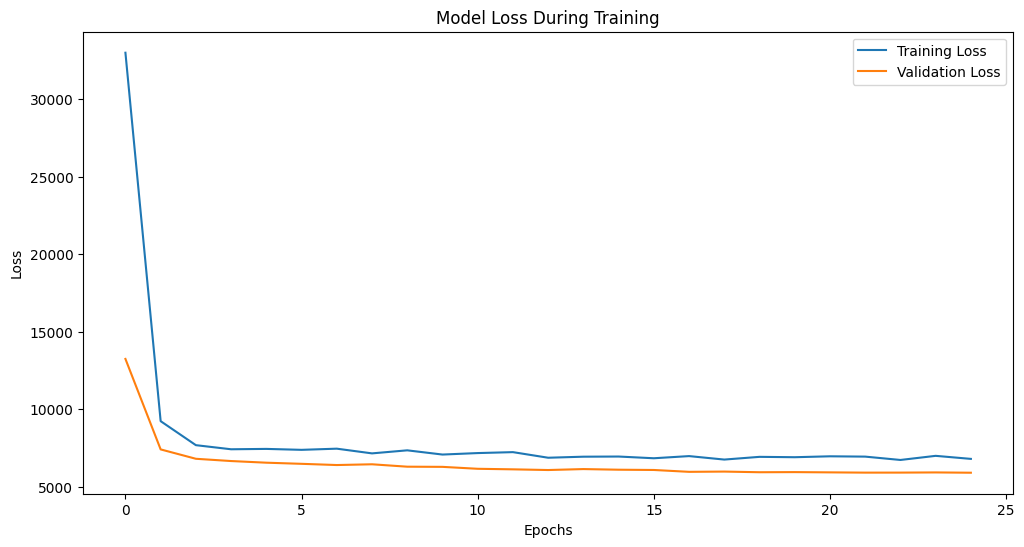

In [24]:
# Plot training history

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# make predictions

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
MAPE on the Training Data: 26.25%
MAPE on the Validation Data: 27.70%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


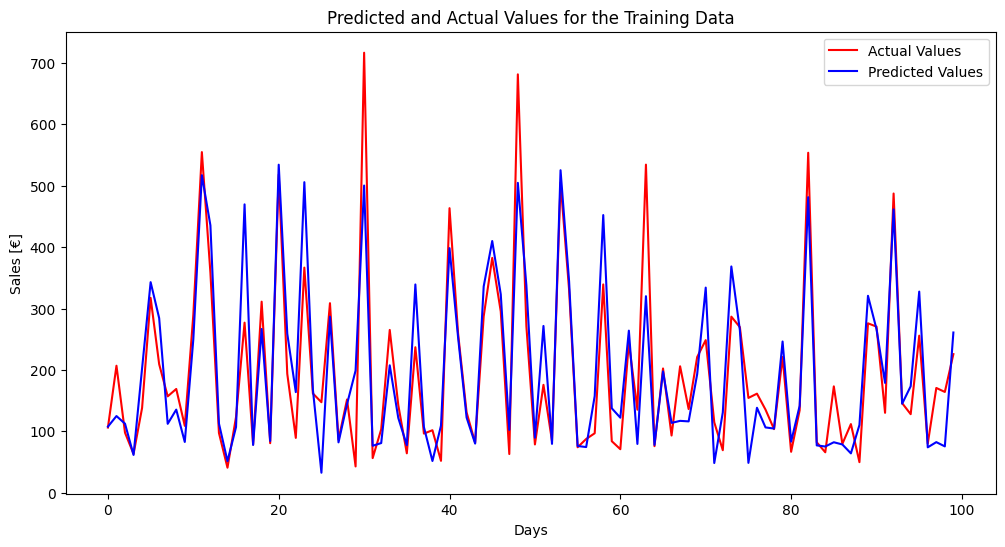

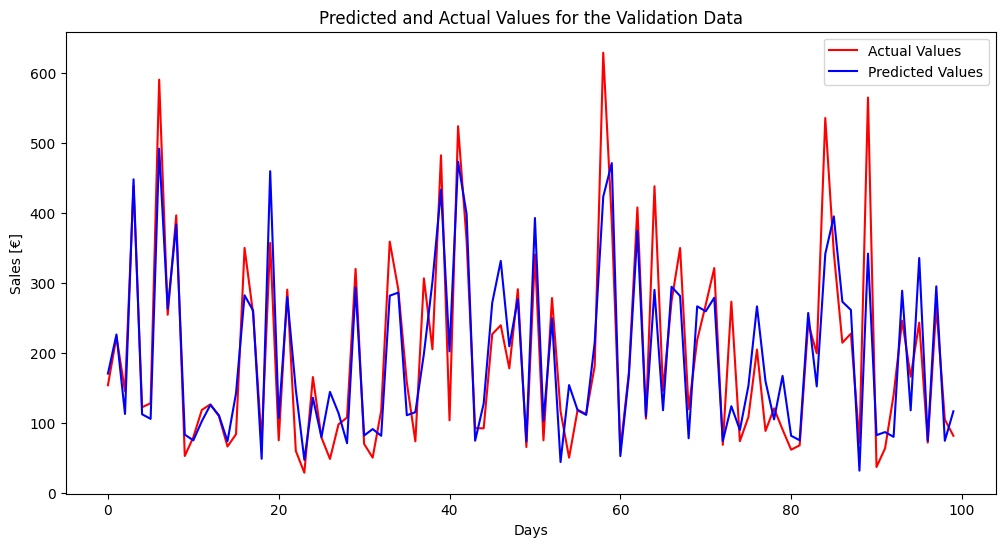

In [26]:
# plot predicted vs. actual values

def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Sales [€]')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [27]:
data_train.size

12968